In [2]:
import numpy as np
import pandas as pd
from DS_models_stat import do_all_stats, cut_cat
from astropy.coordinates import SkyCoord
from astropy import units as u
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

In [3]:
#df41 = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv')
df41 = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn.csv')
df41 = cut_cat(df41, big_pix=[41]) 

In [4]:
mp_q = np.array(df41['max_pred'].quantile(np.arange(0.0, 1.05, 0.05)))
mp_q

array([0.1002816 , 0.11052042, 0.12080721, 0.13806235, 0.15828426,
       0.17664718, 0.20331143, 0.23413718, 0.26054414, 0.30283457,
       0.35258651, 0.39810381, 0.46261602, 0.53243184, 0.60265699,
       0.67866516, 0.79222592, 0.86234755, 0.91789799, 0.97631503,
       0.99771411])

In [5]:
true_cats = {'PSZ2(z)' : '/home/rt2122/Data/clusters/planck_z.csv',
             'PSZ2' : '/home/rt2122/Data/original_catalogs/csv/PSZ2.csv',
            'MCXC' : '/home/rt2122/Data/original_catalogs/csv/MCXC.csv',
            'ACT' : '/home/rt2122/Data/original_catalogs/csv/ACT.csv',
            'Abell' : '/home/rt2122/Data/original_catalogs/csv/Abell.csv',
            'eROSITA' : '/home/rt2122/Data/SRGz/clusters/clusters1_east_val_edit.csv'}
true_cats = {key : pd.read_csv(true_cats[key]) for key in true_cats}

big_pix = [41]
true_cats = {key : cut_cat(true_cats[key], big_pix = big_pix) for key in true_cats}
true_cats_sc = {key : SkyCoord(ra=np.array(true_cats[key]['RA']) * u.degree, 
                               dec=np.array(true_cats[key]['DEC']) * u.degree, frame='icrs') for key in true_cats}

In [6]:
prec41 = []
for st, en in tqdm(zip(mp_q[:-1], mp_q[1:])):
    cur_df = df41[df41['max_pred'] >= st]
    cur_df.index = np.arange(len(cur_df))
    
    stats = do_all_stats(cur_df, true_cats, true_cats_sc=true_cats_sc, match_dist=400/3600)
    prec41.append(stats['precision'])

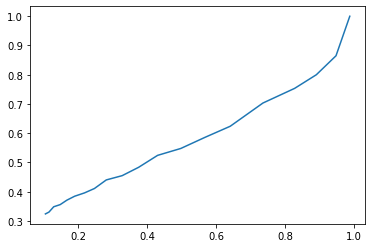

In [7]:
plt.plot((mp_q[:-1] + mp_q[1:])/2, prec41)

In [8]:
for st, en, prec_val in zip(mp_q[:-1], mp_q[1:], prec41):
    print(st, prec_val)

0.10028160156475173 0.3241758241758242
0.11052042427472769 0.33043478260869563
0.12080720694407318 0.3486238532110092
0.1380623487988487 0.3559870550161812
0.15828426368534565 0.3711340206185567
0.17664718453306705 0.38461538461538464
0.20331142580447098 0.396078431372549
0.23413717965595432 0.4110169491525424
0.26054414063692105 0.44036697247706424
0.30283457088749854 0.455
0.35258650965988636 0.4835164835164835
0.3981038121739402 0.524390243902439
0.46261602081358455 0.547945205479452
0.532431840121613 0.5859375
0.6026569897308945 0.6238532110091743
0.678665159852244 0.7032967032967034
0.792225924320519 0.7534246575342466
0.8623475469881668 0.8
0.9178979861550033 0.8648648648648649
0.9763150305021552 1.0


In [9]:
mp_q[0] = 0
mp_q[-1] = 1
mp_q

array([0.        , 0.11052042, 0.12080721, 0.13806235, 0.15828426,
       0.17664718, 0.20331143, 0.23413718, 0.26054414, 0.30283457,
       0.35258651, 0.39810381, 0.46261602, 0.53243184, 0.60265699,
       0.67866516, 0.79222592, 0.86234755, 0.91789799, 0.97631503,
       1.        ])

In [10]:
prec41.append(1.0)

In [11]:
def find_prec(st, en, prec1, prec2, cur_mp):
    
    def find_kb(coords1, coords2):
        #y1 = kx1 + b
        #y2 = kx2 + b
        #y1- y2 = k(x1 - x2)
        #k = (y1-y2)/(x1-x2)
        #b=y1-kx1
        k = coords1[1] - coords2[1]
        k /= coords1[0] - coords2[0]
        b = coords1[1] - k * coords1[0]
        return k, b
    
    k, b = find_kb([st, prec1], [en, prec2])
    if st <= cur_mp and cur_mp <= en:
        return k * cur_mp + b
    else:
        return -1

In [12]:
#df = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv')
df = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn.csv')
df = df.sort_values(by='max_pred', axis='index', ascending=True)
df['mpp'] = 0
df.index = np.arange(len(df))
df.head(4)

,RA,DEC,area,min_rad,max_rad,mean_rad,min_pred,max_pred,tRA,tDEC,status,catalog,M500,z,pix2,mpp
0,188.363958,4.748388,1.0,0.0,1.414214,0.853553,0.100011,0.100011,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0
1,218.550729,7.653272,1.0,0.0,1.414214,0.853553,0.100012,0.100012,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0
2,199.894434,-54.752342,1.0,0.0,1.414214,0.853553,0.100012,0.100012,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0
3,12.433216,69.732549,1.0,0.0,1.414214,0.853553,0.100022,0.100022,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0


In [13]:
i = 0
st = mp_q[i]
en = mp_q[i + 1]
prec1 = prec41[i]
prec2 = prec41[i + 1]
for j in tqdm(range(len(df))):
    line = df.iloc[j]
    mp = line['max_pred']
    if mp > en:
        i += 1
        st = mp_q[i]
        if i + 1 >= len(mp_q):
            en = 1
        else:
            en = mp_q[i + 1]
        prec1 = prec41[i]
        prec2 = prec41[i + 1]
    prec_val = find_prec(st, en, prec1, prec2, mp)
    if prec_val < 0 or not (prec1 <=prec_val and prec_val <= prec2):
        break
    df.loc[j, 'mpp'] = prec_val

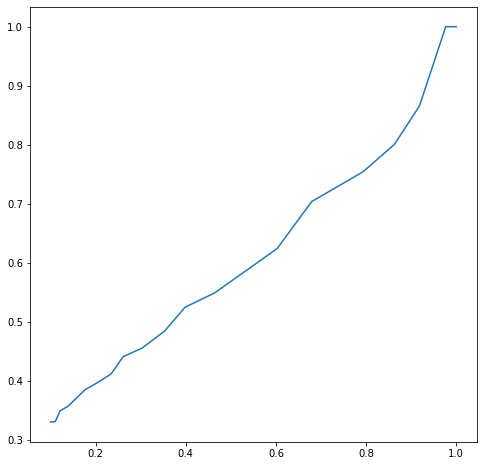

In [14]:
_, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(df['max_pred'], df['mpp'])

In [15]:
df

,RA,DEC,area,min_rad,max_rad,mean_rad,min_pred,max_pred,tRA,tDEC,status,catalog,M500,z,pix2,mpp
0,188.363958,4.748388,1.0,0.000000,1.414214,0.853553,0.100011,0.100011,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0.329840
1,218.550729,7.653272,1.0,0.000000,1.414214,0.853553,0.100012,0.100012,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0.329840
2,199.894434,-54.752342,1.0,0.000000,1.414214,0.853553,0.100012,0.100012,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0.329840
3,12.433216,69.732549,1.0,0.000000,1.414214,0.853553,0.100022,0.100022,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0.329840
4,73.340993,66.039037,1.0,0.000000,1.414214,0.853553,0.100031,0.100031,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0.329841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23326,90.796013,42.214613,33.0,1.948054,5.490656,3.486346,0.109227,0.999985,90.839443,42.23229,tp,planck_z,10.759314,0.228,train_pix,1.000000
23327,227.997438,-59.713060,35.0,1.170771,6.421239,3.672577,0.115916,0.999992,NaN,NaN,fp,NaN,NaN,NaN,train_pix,1.000000
23328,258.142204,-23.362897,42.0,1.923147,5.684268,3.842497,0.100231,0.999998,258.103000,-23.35000,tp,mcxcwp,5.312300,0.028,train_pix,1.000000
23329,135.663695,-48.088486,32.0,1.850095,6.689222,3.387751,0.126578,1.000000,NaN,NaN,fp,NaN,NaN,NaN,train_pix,1.000000


In [16]:
#df.to_csv('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn_mpp.csv', index=False)
df.to_csv('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn_mpp.csv', index=False)